In [1]:
from ipywidgets import widgets
import networkx as nx
from IPython import display as dis
import random
import pylab
from matplotlib.pyplot import pause
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

# Display actual graph situation

In [2]:
# Print situation a wait a set time
def node(title, color_map, sec):
    plt.figure(3,figsize=(10,10))
    plt.title(title)
    nx.draw(g, pos=pos, with_labels=True, node_color = color_map, node_size=500, width=1, font_color='w', font_size=17)
    plt.show()
    plt.pause(sec)
    dis.clear_output(wait=True)

# Generate random graph

In [5]:
def randomGraphGenerator(n_nodes, n_edges):
    g = nx.Graph()
    nodes = {}
    for i in range(n_nodes):
        g.add_node(i)
        nodes[i] = set()

    edges_count = 0
    while edges_count < n_edges:
        edge = (random.randint(0, n_nodes-1), random.randint(0, n_nodes-1))
        if edge[0] != edge[1]:
            if edge[1] not in nodes[edge[0]]:
                nodes[edge[0]].add(edge[1])
                nodes[edge[1]].add(edge[0])
                edges_count += 1
                g.add_edges_from([edge])
    color_map = ['k' for i in range(n_nodes)]
    return g, nodes, color_map

# Basic backtracking

['r', 'b', 'r', 'g', 'b']


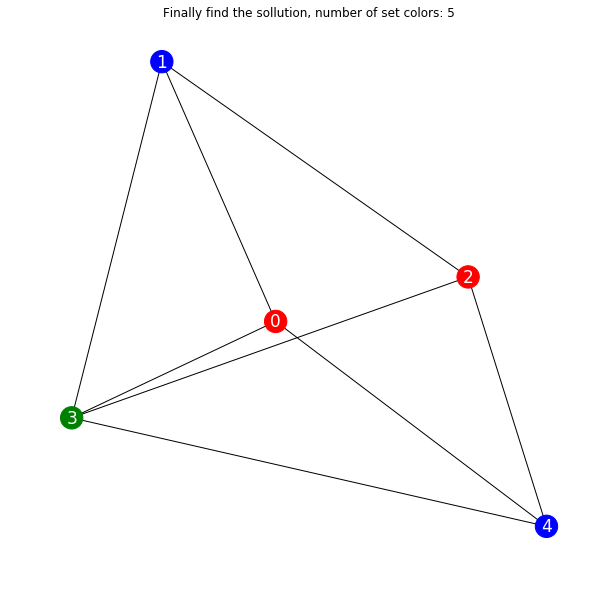

In [34]:
# generate graph
g, nodes, color_map = randomGraphGenerator(n_nodes = 5, n_edges = 8)
# basic seconds to selecting node
sec_pause = 3
# position of nodes in graph. shell -> circle, random -> chaos
#pos = nx.shell_layout(g)
pos = nx.random_layout(g)


class BackTrack:
    
    def __init__(self, assigment, nodes):
        self.counter = 0
        self.assigment = assigment
        self.nodes = nodes 
        self.colors = ['r', 'b', 'g']
        node("START", self.assigment, sec_pause/4)
    
    def backTracking(self):
        # If all assign return solution
        if int(self.assigment.count('k')) == 0:
            return self.assigment
        # Select some note to assign 
        to_assign = self.returnUnassigment()
        # For each color
        for color in self.colors:
            borderColor = set()
            for i in self.nodes[to_assign]:
                borderColor.add(self.assigment[i])
            # Select only color which is possible
            if color not in borderColor:
                # Set
                self.counter += 1
                node("CNT: {}. TRY NODE {} COLOR {}".format(self.counter,to_assign,color), self.assigment, sec_pause)
                self.assigment[to_assign] = color
                node("COLOR SET", self.assigment, sec_pause/4)
                # And do next
                color_map = self.backTracking()
                if color_map is not None:
                    return self.assigment
        # If cant set next go back a disable assigment to this node.
        node("CANT SET -> GO BACK", self.assigment, sec_pause/4)
        self.assigment[to_assign] = 'k'
        return None
    
    # Resturn some node to assign -> there can be some magic
    def returnUnassigment(self):
        for i, j in enumerate(self.assigment):
            if j == 'k':
                return i
    
    def getCnt(self):
        return self.counter
    
backtrack = BackTrack(color_map, nodes)
color_map = backtrack.backTracking()
if color_map is None:
    print("No solution, number of check colors: {}".format(backtrack.getCnt()))
else: 
    print(color_map)
    node("Finally find the sollution, number of set colors: {}".format(backtrack.getCnt()), color_map, 10)
    
    


# Backtracking with maintaining arc consistency

['r', 'b', 'g', 'b', 'r']


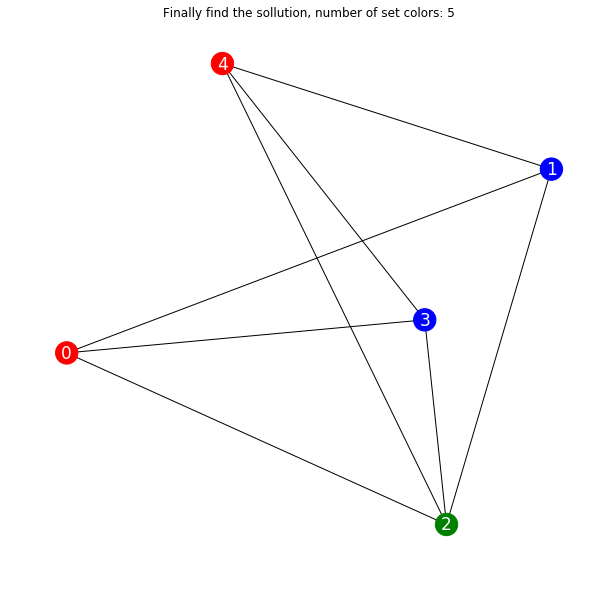

In [31]:
# generate graph
g, nodes, color_map = randomGraphGenerator(n_nodes = 5, n_edges = 8)
# basic seconds to selecting node
sec_pause = 3
# position of nodes in graph. shell -> circle, random -> chaos
#pos = nx.shell_layout(g)
pos = nx.random_layout(g)


class BackTrack:
    
    def __init__(self, assigment, nodes):
        self.counter = 0
        self.assigment = assigment
        self.nodes = nodes 
        self.colors = ['r', 'b', 'g']
        node("START", self.assigment, sec_pause/4)
    
    def checkConsistency(self):
        # Possible to nodes
        self.D = [{i for i in self.colors} if i == 'k' else {i} for i in self.assigment]
        setOfArc = set()
        for node in self.nodes:
            for i in self.nodes[node]:
                setOfArc.add((i, node))
        # All edge in queue
        queue = [x for x in setOfArc]
        while len(queue) > 0:
            arc = queue.pop(0)
            # Check this node
            if self.revise(arc):
                if len(self.D[arc[0]]) == 0: return False
                for x in self.nodes[arc[0]]:
                    queue.append((x,arc[0]))
        return True
    
    def revise(self, arc):
        revised = False
        colors = [x for x in self.D[arc[0]]]
        for x in colors:
            # If no color allow to use this x -> remove this X
            if len(self.D[arc[1]]) <= 1 and x in self.D[arc[1]]:
                self.D[arc[0]].remove(x)
                revised = True
    
        return revised
    
    # Same as backtracking allow only with add consistency
    def backTracking(self):
        if int(self.assigment.count('k')) == 0:
            return self.assigment
        to_assign = self.returnUnassigment()
        
        for color in self.colors:
            
            
            borderColor = set()
            for i in self.nodes[to_assign]:
                borderColor.add(self.assigment[i])
                
            if color not in borderColor:
                
                node("CNT: {}. TRY NODE {} COLOR {}".format(self.counter,to_assign,color), self.assigment, sec_pause)
                
                self.assigment[to_assign] = color
                self.counter += 1
                node("COLOR SET", self.assigment, sec_pause/4)
                
                # After set color try to check consistency
                node("CHECK CONSISTENCY", self.assigment, sec_pause/4)
                # Check if can set this color with arc consistency
                if not self.checkConsistency():
                    node("NOT OK NEXT COLOR TRY", self.assigment, sec_pause/4)
                    self.assigment[to_assign] = 'k'
                    continue
                node("OK", self.assigment, sec_pause/4)
                
                
                color_map = self.backTracking()
                if color_map is not None:
                    return self.assigment
                
        node("CANT SET -> GO BACK", self.assigment, sec_pause/4)
        self.assigment[to_assign] = 'k'
        return None
    
    def returnUnassigment(self):
        for i, j in enumerate(self.assigment):
            if j == 'k':
                return i
    
    def getCnt(self):
        return self.counter
    
backtrack = BackTrack(color_map, nodes)
color_map = backtrack.backTracking()
if color_map is None:
    print("No solution, number of check colors: {}".format(backtrack.getCnt()))
else: 
    print(color_map)
    node("Finally find the sollution, number of set colors: {}".format(backtrack.getCnt()), color_map, 10)
    

# Backjumping 

In [ ]:
# generate graph
g, nodes, color_map = randomGraphGenerator(n_nodes = 5, n_edges = 8)
# basic seconds to selecting node
sec_pause = 3
# position of nodes in graph. shell -> circle, random -> chaos
#pos = nx.shell_layout(g)
pos = nx.random_layout(g)


class BackTrack:
    
    def __init__(self, assigment, nodes):
        self.counter = 0
        self.assigment = assigment
        self.steps = {}
        self.nodes = nodes 
        self.colors = ['r', 'b', 'g']
        self.steps[-1] = [{i for i in self.colors} for i in range(len(self.nodes))]
        node("START", self.assigment, sec_pause/4)
    
    def backTracking(self, node):
        if int(self.assigment.count('k')) == 0:
            return self.assigment
        to_assign = node
        
        
        for color in self.steps[node-1]:
                
            #node("CNT: {}. TRY NODE {} COLOR {}".format(self.counter,to_assign,color), self.assigment, sec_pause)
            
            
            
            self.assigment[to_assign] = color
            self.counter += 1
            #node("COLOR SET", self.assigment, sec_pause/4)
                
                
            color_map = self.backTracking()
            if color_map is not None:
                return self.assigment
                
        # Jump back
        node("CANT SET -> GO BACK", self.assigment, sec_pause/4)
        self.assigment[to_assign] = 'k'
        return None
    
    def returnUnassigment(self):
        for i, j in enumerate(self.assigment):
            if j == 'k':
                return i
    
    def getCnt(self):
        return self.counter
    
backtrack = BackTrack(color_map, nodes)
color_map = backtrack.backTracking()
if color_map is None:
    print("No solution, number of check colors: {}".format(backtrack.getCnt()))
else: 
    print(color_map)
    node("Finally find the sollution, number of set colors: {}".format(backtrack.getCnt()), color_map, 10)